<a href="https://colab.research.google.com/github/sohrab-namazi/Perecptron-Binary_Classification-Back_Propagation/blob/main/CI992_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sohrab Namazinia



# Perceptron

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# because of the simplicity of this problem, i have used perceptron algorithm 

# set NOR data
# i have used -1 as logical zero and 1 as logical 1
dataset = np.array(([-1, -1, 1], [-1, 1, -1], [1, -1, -1], [1, 1, -1]), dtype="double")
Y = dataset[:, 2]
X = dataset[:, 0:2]

# add bias input (it is always is 1) to X elements
bias_input = np.ones((4, 1), dtype="double");
X = np.hstack((bias_input, X))

# random weight initialization
W = np.random.rand(3)
# learning rate
alpha = 0.1
# set epoch 
epoch_count = 100000
epoch = 0


# weights before training
print("Weights before training:")
for i in range(3):
  if i == 0:
    print("\tbias : " + str(W[i]))
  
  else:
    print("\tW" + str(i) + " : " + str(W[i]))

Weights before training:
	bias : 0.617801570644111
	W1 : 0.24726908818517612
	W2 : 0.35420471602740466


In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.
while epoch < epoch_count:
  data_index = 0
  for x in X:
    # comput y
    y = np.dot(x, W)
    y = np.sign(y)
    # compute desired response
    d = Y[data_index]
    error = d - y
    W += alpha * error * x
    data_index += 1
  # next epoch
  epoch += 1

# wights after training
print("Weights after training:")
for i in range(3):
  if i == 0:
    print("bias : " + str(W[i]))
  
  else:
    print("W" + str(i) + " : " + str(W[i]))

print("\n")

# test the data with updated weights
for x in X:
  dot = np.dot(x, W)
  Class = 0
  if dot > 0:
    Class = 1
  print(str(x[1:]) + ":\n\t" + "W.X = " + str(dot) + " => " + str(Class))
  

Weights after training:
bias : -0.18219842935588904
W1 : -0.1527309118148239
W2 : -0.04579528397259536


[-1. -1.]:
	W.X = 0.016327766431530222 => 1
[-1.  1.]:
	W.X = -0.0752628015136605 => 0
[ 1. -1.]:
	W.X = -0.2891340571981176 => 0
[1. 1.]:
	W.X = -0.3807246251433083 => 0


# Binary Classification

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.

# i have used Adaline algorithm for this problem

# fetch data 
data = np.loadtxt('data.txt', delimiter=',')
X = data[:, 0:2]
Y = data[:, 2]
data_count = len(Y)
feature_count = 2

# convert 0s to -1s in Y
for i in range(data_count):
  if (Y[i] == 0):
    Y[i] = -1

# add bias
bias_input = np.ones((data_count, 1), dtype="double");
X = np.hstack((bias_input, X))

# random weight initialization
W = np.random.rand(feature_count + 1)
# learning rate
alpha = 1
# set epoch 
epoch_count = 50000
epoch = 0

# weights before training
print("Weights before training:")
for i in range(3):
  if i == 0:
    print("\tbias : " + str(W[i]))
  
  else:
    print("\tW" + str(i) + " : " + str(W[i]))

# store errors for ploting it in the next cell
error_storage = []

# Perceptron
while (epoch < epoch_count):
  alpha = (1 / (epoch + 1));
  data_index = 0
  epoch_error = 0.0
  for x in X:
    d = Y[data_index]
    y = np.dot(x, W)
    activated = np.sign(y)
    error = d - activated
    if abs(error) == 2:
     epoch_error += 1;
    W += alpha * x * error 
    data_index += 1
  #average_error /= data_count
  error_storage.append(epoch_error)
  epoch += 1

print("\n")

# wights after training
print("Weights after training:")
for i in range(3):
  if i == 0:
    print("\tbias : " + str(W[i]))
  
  else:
    print("\tW" + str(i) + " : " + str(W[i]))


Weights before training:
	bias : 0.6314323924364726
	W1 : 0.16809802959391829
	W2 : 0.35013208401540574


Weights after training:
	bias : -138.75113089638103
	W1 : -0.5639000300761704
	W2 : 0.4205617358552681


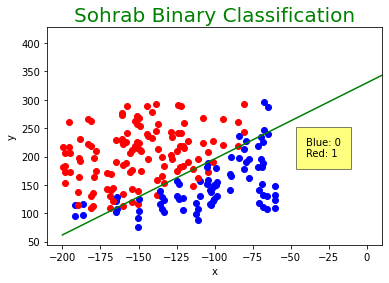

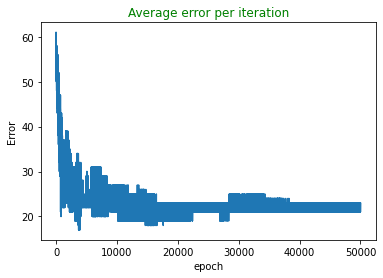

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your codes.

# plot classification
x = np.linspace(-200.,60.)
fig, ax = plt.subplots()
ax.plot(x,(-W[1]*x - W[0]) / W[2], color="green")
Xx = [x[1] for x in X]
Xy = [x[2] for x in X]
ax.set_xlim((-210.,10.))
for i in range(data_count):
  if Y[i] == 1:
    plt.scatter(Xx[i], Xy[i], color="red")
  else:
    plt.scatter(Xx[i], Xy[i], color= "blue")
plt.title("Sohrab Binary Classification", fontsize=20, color="green")
plt.xlabel('x')
plt.ylabel('y')
ax.text(-40, 200, 'Blue: 0\nRed: 1', bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})
plt.show()

# plot error decay by iteration
plt.plot(np.arange(epoch_count), error_storage)
plt.title("Average error per iteration", color="green")
plt.xlabel('epoch')
plt.ylabel('Error')
plt.show()


# MLP

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# fetch data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
row_column_size = len(x_train[0])
feature_count = row_column_size * row_column_size
max_pixel_value = 255
train_data_count = len(y_train)
test_data_count = len(y_test)
batch_size = int(train_data_count / 100)

# method for giving the proper data to our NN.
def reformat_data(x_train, y_train, x_test, y_test):
  x_train_reformatted = x_train.reshape((train_data_count, feature_count))
  x_train_reformatted = x_train_reformatted.astype(float)
  x_train_reformatted /= max_pixel_value
  x_test_reformatted = x_test.reshape((test_data_count, feature_count))
  x_test_reformatted = x_test_reformatted.astype(float)
  x_test_reformatted /= max_pixel_value
  y_train_reformatted = to_categorical(y_train)
  y_test_reformatted = to_categorical(y_test)
  return (x_train_reformatted, y_train_reformatted), (x_test_reformatted, y_test_reformatted)


# build NN
network = Sequential()
network.add(Dense(feature_count, activation='relu', input_shape=(feature_count,)))
network.add(Dense(feature_count, activation='relu', input_shape=(feature_count,)))
network.add(Dense(10, activation="softmax"))

# compile NN
network.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# prepare well-formatted data
(x_train_reformatted, y_train_reformatted), (x_test_reformatted, y_test_reformatted) = reformat_data(x_train, y_train, x_test, y_test)

# training
history = network.fit(x_train_reformatted, y_train_reformatted, epochs=10, batch_size=batch_size)
print("************************************************************************************\n")
print("TRAINING IS DONE\n")

# test
loss, acc = network.evaluate(x_test_reformatted, y_test_reformatted)
print("TEST IS DONE:")
print("Loss : " + str(loss))
print("Accruacy : " + str(acc))

Epoch 1/10
100/100 [==============================] - 8s 76ms/step - loss: 0.6082 - accuracy: 0.8289
Epoch 2/10
100/100 [==============================] - 8s 76ms/step - loss: 0.1120 - accuracy: 0.9670
Epoch 3/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0620 - accuracy: 0.9817
Epoch 4/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0465 - accuracy: 0.9856
Epoch 5/10
100/100 [==============================] - 8s 75ms/step - loss: 0.0276 - accuracy: 0.9925
Epoch 6/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 7/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 8/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0098 - accuracy: 0.9976
Epoch 9/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0082 - accuracy: 0.9981
Epoch 10/10
100/100 [==============================] - 8s 76ms/step - loss: 0.0054 - accura

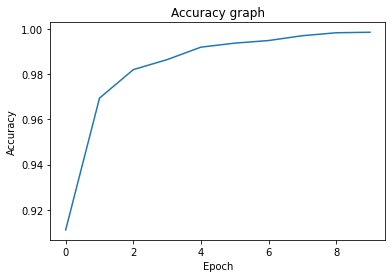

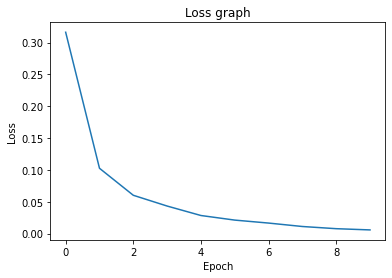

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your codes.

# plot accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# plot loss graph
plt.plot(history.history['loss'])
plt.title('Loss graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


# Back-Propagation

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Q5_graded
# Do not change the above line.

# utility section 
# some useful variables and methods

train_data_count = 60000
max_pixel_value = 255
feature_count = 28 * 28
output_count = 10
epoch_count = 1000
acc_storage = []
error_storage = []


def hidden_activation(Z):
    return np.maximum(Z, 0);

def hidden_activation_derivation(Z):
    return Z > 0;

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def evaluate(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = hidden_activation(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return a2

def get_predictions(activation_2):
    return np.argmax(activation_2, 0)

def one_hot_encode(Y):
    one_hot_Y = np.zeros((Y.size, int(Y.max()) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    # return its transpose
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def compute_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def compute_error(predictions, Y):
    return np.sum(predictions != Y) / Y.size

def print_epoch_result(i, acc, err):
  if (i % 100 == 0) or (i == epoch_count - 1):
    print("Epoch " + str(i) + ":\n\tAccuracy = " + str(acc))
    print("\tError = " + str(err) + "\n")

In [ ]:
# Q5_graded
# Do not change the above line.

# epochs and iterations on data

def run(X, Y, epoch_count, learning_rate):
    w1, b1 = (np.random.rand(output_count, feature_count) * 2) - 1, (np.random.rand(output_count, 1) * 2) - 1
    w2, b2 = (np.random.rand(output_count, output_count) * 2) - 1, (np.random.rand(output_count, 1) * 2) - 1
    for i in range(epoch_count):
        z1 = w1.dot(X) + b1
        activation_1 = hidden_activation(z1)
        z2 = w2.dot(activation_1) + b2
        activation_2 = softmax(z2)
        one_hot_Y = one_hot_encode(Y)
        diff_2 = activation_2 - one_hot_Y
        dw2 = 1 / train_data_count * diff_2.dot(activation_1.T)
        db2 = 1 / train_data_count * np.sum(diff_2)
        diff_1 = hidden_activation_derivation(z1) * w2.T.dot(diff_2)  
        dw1 = 1 / train_data_count * diff_1.dot(X.T)
        db1 = 1 / train_data_count * np.sum(diff_1)
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b1 -= learning_rate * db1
        b2 -= learning_rate * db2
        predictions = get_predictions(activation_2)
        acc = compute_accuracy(predictions, Y)
        err = compute_error(predictions, Y)
        error_storage.append(err)
        acc_storage.append(acc)
        print_epoch_result(i, acc, err)
    return (b1, w1), (b2, w2)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), feature_count)
input_data = np.hstack((x_train, y_train.reshape(len(y_train), 1)))
np.random.shuffle(input_data)
x_train = input_data[:, :-1]
y_train = input_data[:, -1]
x_train = x_train / max_pixel_value
x_train = x_train.T
(b1, w1), (b2, w2) = run(x_train, y_train, epoch_count, 0.1)
print("****************\nTraining finished!\n****************\n")


Epoch 0:
	Accuracy = 0.12298333333333333
	Error = 0.8770166666666667

Epoch 100:
	Accuracy = 0.31888333333333335
	Error = 0.6811166666666667

Epoch 200:
	Accuracy = 0.4074333333333333
	Error = 0.5925666666666667

Epoch 300:
	Accuracy = 0.49225
	Error = 0.50775

Epoch 400:
	Accuracy = 0.5885666666666667
	Error = 0.4114333333333333

Epoch 500:
	Accuracy = 0.6632166666666667
	Error = 0.3367833333333333

Epoch 600:
	Accuracy = 0.7103833333333334
	Error = 0.2896166666666667

Epoch 700:
	Accuracy = 0.7441
	Error = 0.2559

Epoch 800:
	Accuracy = 0.7160833333333333
	Error = 0.28391666666666665

Epoch 900:
	Accuracy = 0.7663
	Error = 0.2337

Epoch 999:
	Accuracy = 0.7765333333333333
	Error = 0.22346666666666667

****************
Training finished!
****************



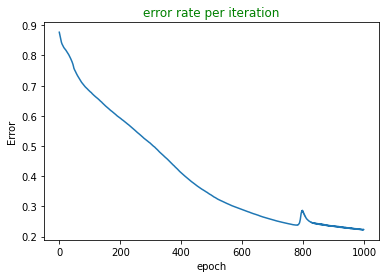

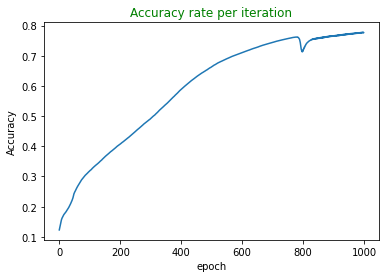

In [ ]:
# Q5_graded
# Do not change the above line.

# plot result
plt.plot(np.arange(epoch_count), error_storage)
plt.title("error rate per iteration", color="green")
plt.xlabel('epoch')
plt.ylabel('Error')
plt.show()

plt.plot(np.arange(epoch_count), acc_storage)
plt.title("Accuracy rate per iteration", color="green")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# evaluate
x_test = x_test.reshape(len(x_test), feature_count)
input_data = np.hstack((x_test, y_test.reshape(len(y_test), 1)))
np.random.shuffle(input_data)
x_test = input_data[:, :-1]
y_test = input_data[:, -1]
x_test = x_test / max_pixel_value
x_test = x_test.T
w1, b1 = (np.random.rand(output_count, feature_count) * 2) - 1, (np.random.rand(output_count, 1) * 2) - 1
w2, b2 = (np.random.rand(output_count, output_count) * 2) - 1, (np.random.rand(output_count, 1) * 2) - 1
z1 = w1.dot(x_test) + b1
activation_1 = hidden_activation(z1)
z2 = w2.dot(activation_1) + b2
activation_2 = softmax(z2)
predictions = get_predictions(activation_2)